Load a random vector with the divide-and-conquer state preparation.

In [8]:
%pip install numpy
%pip install qiskit-aer
%pip install qiskit
%pip install matplotlib
%pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
from encoding import Encoding
from qiskit import ClassicalRegister, visualization, transpile

In [6]:
input_vector = 2*np.random.rand(16)-1
input_vector = input_vector / np.linalg.norm(input_vector)
expected_probabilities = input_vector ** 2

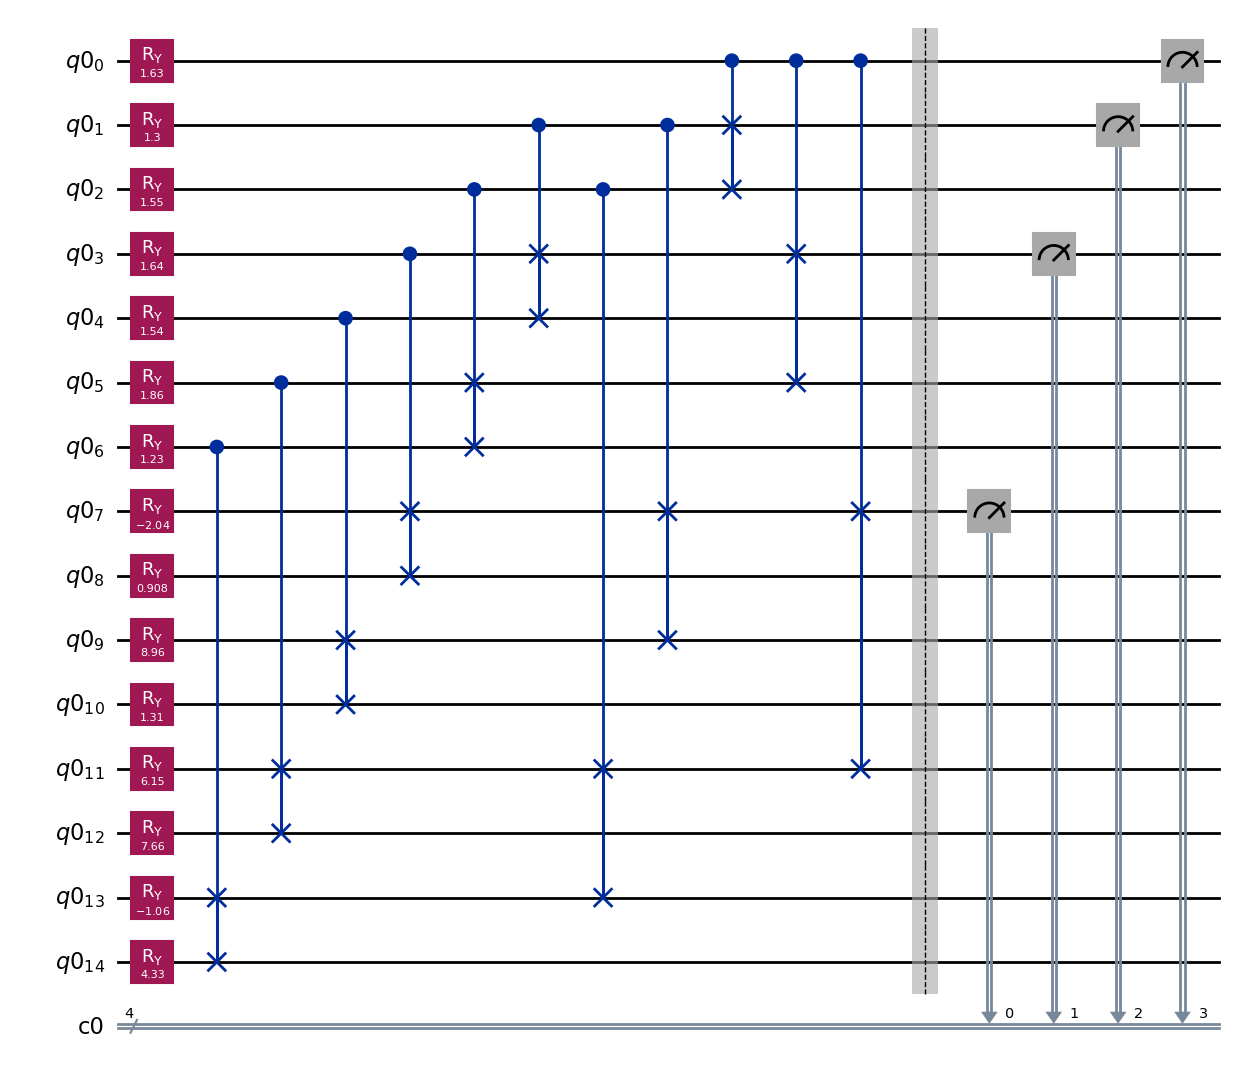

In [7]:
encode = Encoding(input_vector, 'dc_amplitude_encoding')
output = ClassicalRegister(len(encode.output_qubits))
encode.qcircuit.add_register(output)
encode.qcircuit.barrier()

for k, value in enumerate(reversed(encode.output_qubits)):
    encode.qcircuit.measure(encode.quantum_data[value], output[k])
    
encode.qcircuit.draw('mpl')

In [ ]:
circuit = encode.qcircuit
backend_sim = Aer.get_backend('qasm_simulator')
shots = 10000
job = execute(circuit, backend_sim, shots = shots)
results = job.result()
counts = results.get_counts()
visualization.plot_histogram(counts)

In [ ]:
expected_probabilities